## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [ ]:
!pip install psycopg2

In [ ]:
# Вызов необходимых библиотек
import pandas as pd
import numpy as np
import psycopg2
from matplotlib import pyplot as plt
import seaborn as sb

In [ ]:
# Составим запрос, который вернет типы perfomance score

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "db_ds_students",
    "user": "readonly",
    "password": "-------"
}
conn = psycopg2.connect(**pg_connection)

cursor = conn.cursor()
sql_str = 'SELECT * FROM exploratory;'
cursor.execute(sql_str)
performance_score_unique = cursor.fetchall()

cursor.close()
    
result = pd.read_sql_query(sql_str, conn)

In [ ]:
result.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.4399302341553932,-2.180960698389708,33.4684964804719,-1.9273880121739875,-5.3213919475057105
1,1.7705797495879034,-1.174880454210172,0.9895926481354946,-1.1396809115663187,-2.0802195404111687
2,0.7428169764168391,-0.2634829113111655,0.16814863490368492,-0.3324379721161745,-0.19571957951766614
3,-1.510891800324271,2.7125712625192238,-2.6856430298672915,2.0584952423727403,-4.098401678335551
4,-0.4835110394772655,0.096511221663355,-0.028703495808161117,0.1687629004635419,-0.04666424110766956


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feature_1  100 non-null    object
 1   feature_2  100 non-null    object
 2   feature_3  100 non-null    object
 3   feature_4  100 non-null    object
 4   feature_5  100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [ ]:
result['feature_1'] = result['feature_1'].astype(float)
result['feature_2'] = result['feature_2'].astype(float)
result['feature_3'] = result['feature_3'].astype(float)
result['feature_4'] = result['feature_4'].astype(float)
result['feature_5'] = result['feature_5'].astype(float)

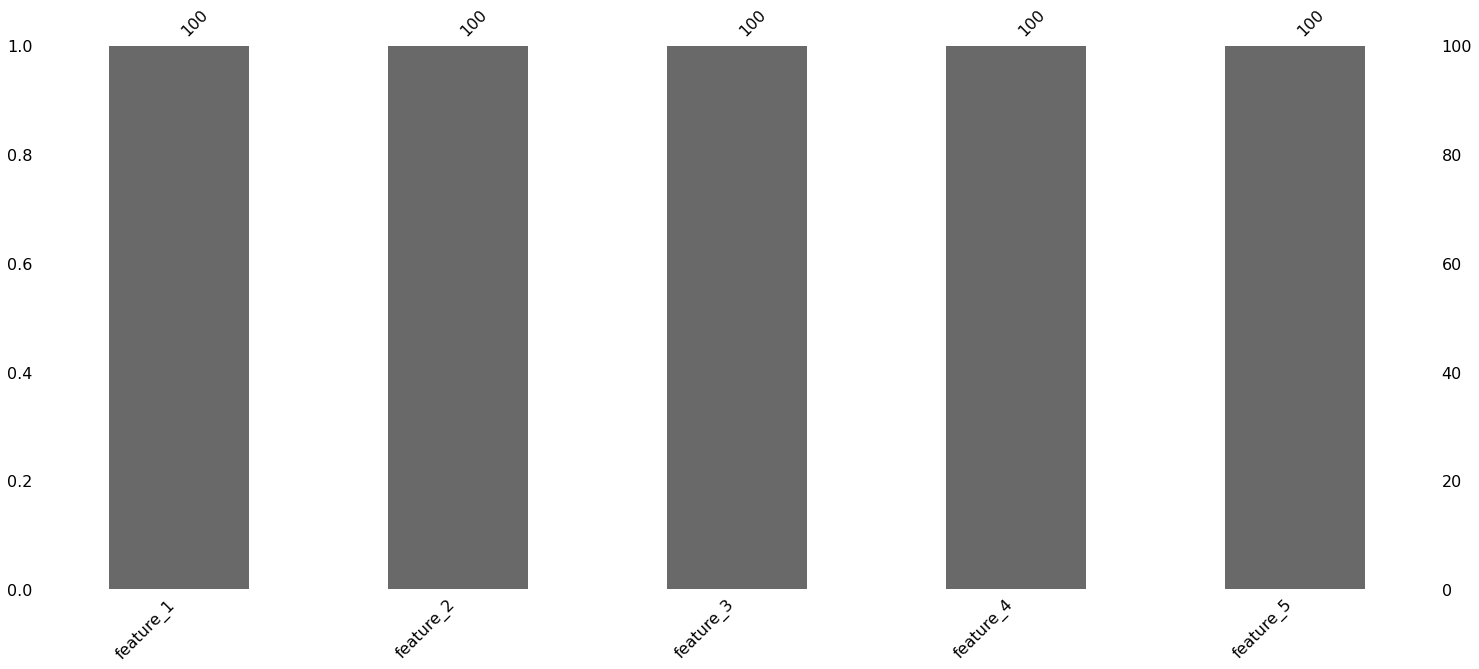

In [ ]:
!pip install missingno

import missingno as msno

msno.bar(result)

Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

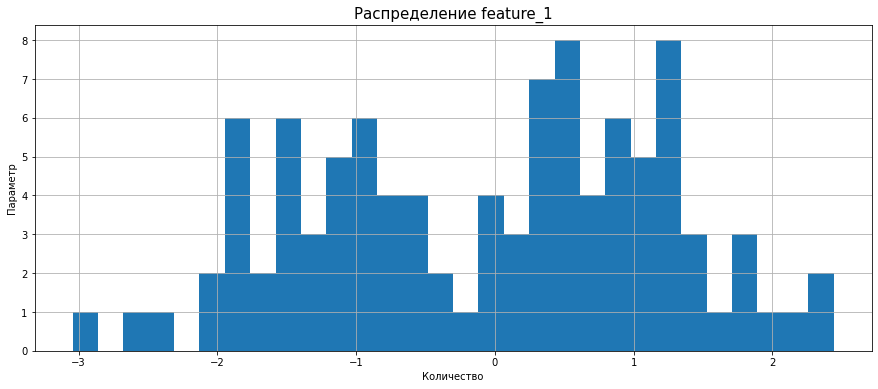

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.hist(result['feature_1'], bins = 30)
plt.xlabel('Количество')
plt.ylabel('Параметр')
plt.title('Распределение feature_1', fontsize = 15)
ax.grid()
plt.show()

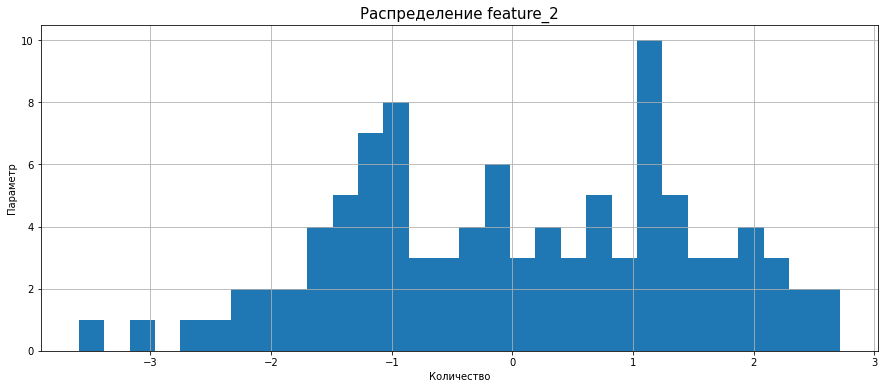

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.hist(result['feature_2'], bins = 30)
plt.xlabel('Количество')
plt.ylabel('Параметр')
plt.title('Распределение feature_2', fontsize = 15)
ax.grid()
plt.show()

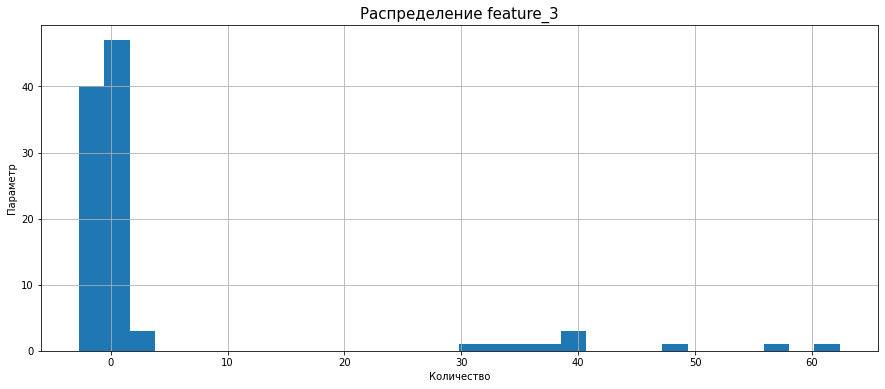

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.hist(result['feature_3'], bins = 30)
plt.xlabel('Количество')
plt.ylabel('Параметр')
plt.title('Распределение feature_3', fontsize = 15)
ax.grid()
plt.show()

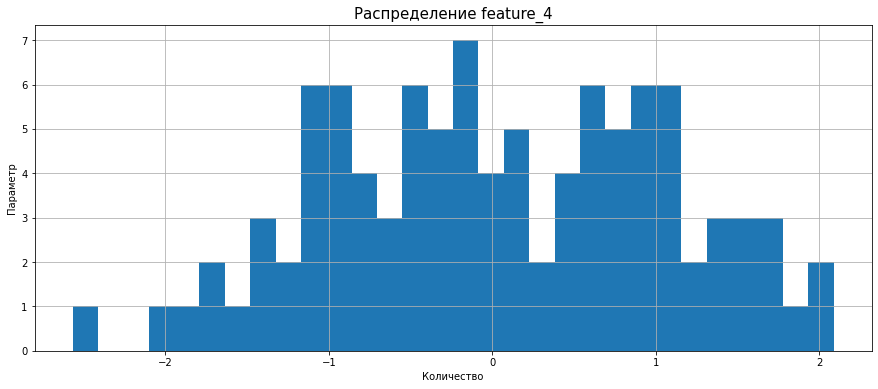

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.hist(result['feature_4'], bins = 30)
plt.xlabel('Количество')
plt.ylabel('Параметр')
plt.title('Распределение feature_4', fontsize = 15)
ax.grid()
plt.show()

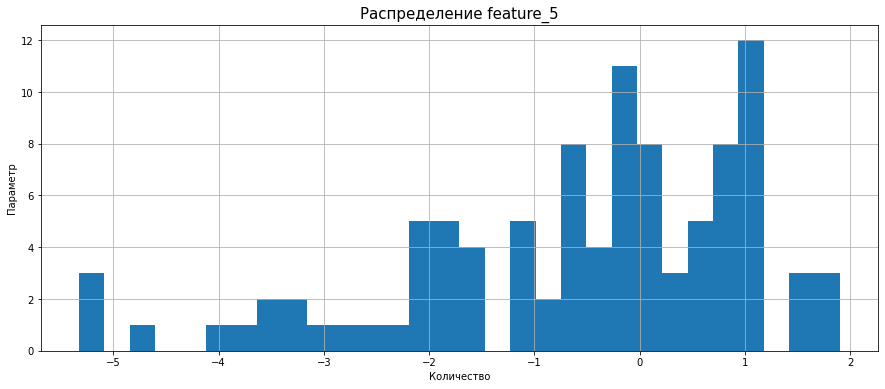

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.hist(result['feature_5'], bins = 30)
plt.xlabel('Количество')
plt.ylabel('Параметр')
plt.title('Распределение feature_5', fontsize = 15)
ax.grid()
plt.show()

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

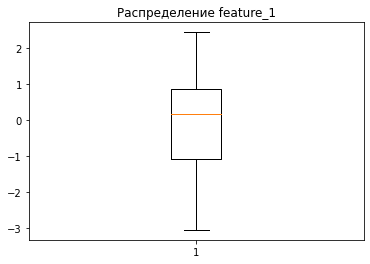

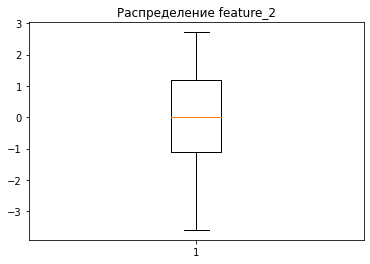

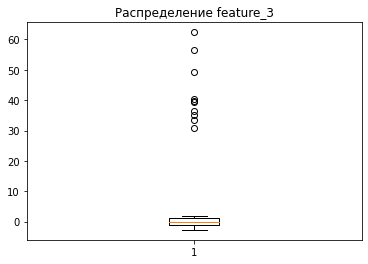

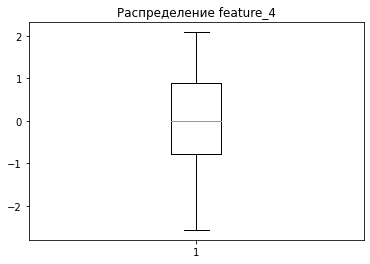

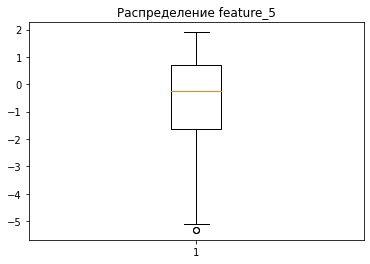

In [ ]:
for i in range (1, 6):
    n = "feature_" + str(i)
    plt.figure()
    plt.title("Распределение " + n)
    plt.boxplot(result[n])

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

In [ ]:
from sklearn.linear_model import LinearRegression

X = result[['feature_4']]
y = result['feature_5']

In [ ]:
# Создаем регрессор

reg = LinearRegression().fit(X, y)

In [ ]:
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены телефона
def reg_prediction(disk):
    return a + b * disk

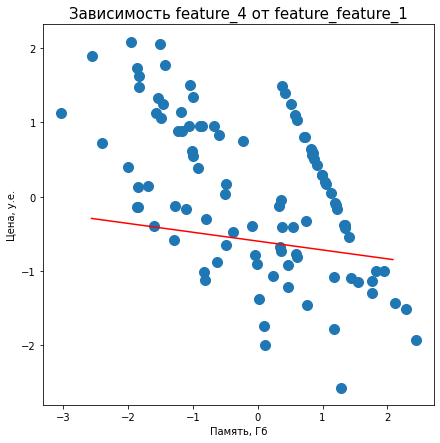

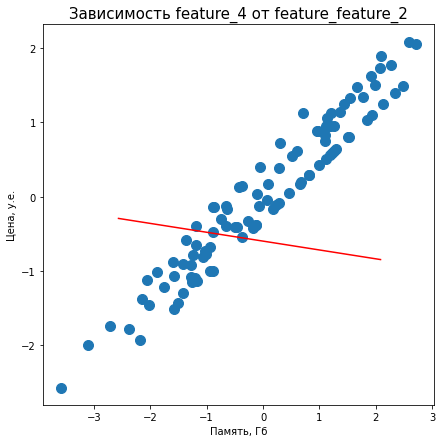

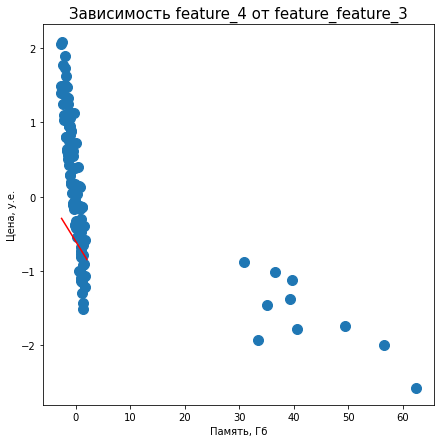

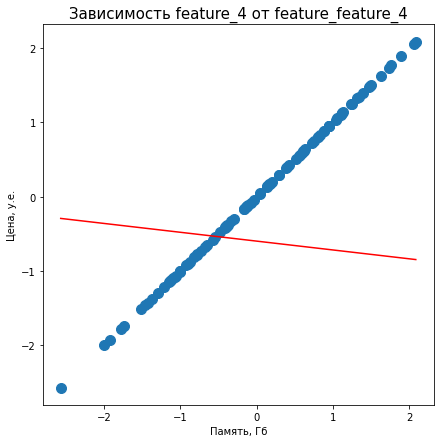

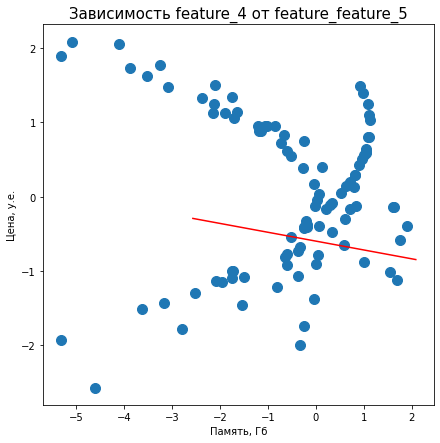

In [ ]:
for i in range (1, 6):
    n = "feature_" + str(i)
    if n == 4:
        n = 5
    fig = plt.figure(figsize=(7, 7)); # создаем картинку
    ax = plt.axes()
    text = 'Зависимость feature_4 от feature_' + n 
    # помещаем точки на график
    ax.scatter(result[n], result["feature_4"], s=100)
    # помещаем предсказания
    ax.plot([X.feature_4.min(), X.feature_4.max()], [reg_prediction(X.feature_4.min()), reg_prediction(X.feature_4.max())], c="red")

    # отображаем картинку
    plt.xlabel('Память, Гб')
    plt.ylabel('Цена, у.е.')
    plt.title(text, fontsize = 15)
    plt.show()